In [16]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
!pip install -U kaleido
!pip install dash

In [17]:
# Load Excel and show sheet names
excel_path = "NDCP2022.xlsx"
excel = pd.ExcelFile(excel_path)
print("Sheet Names:", excel.sheet_names)

# Load the data
df = excel.parse(excel.sheet_names[0])

Sheet Names: ['County_LevelNDCP_v8_update2008_']


In [18]:
# Show column names
print("\nColumn Names:")
print(df.columns.tolist())


Column Names:
['STATE_NAME', 'STATE_ABBREVIATION', 'COUNTY_NAME', 'COUNTY_FIPS_CODE', 'STUDYYEAR', 'EMR_16', 'FEMR_16', 'MEMR_16', 'EMR_20to64', 'FEMR_20to64', 'MEMR_20to64', 'UNR_16', 'FUNR_16', 'MUNR_16', 'UNR_20to64', 'FUNR_20to64', 'MUNR_20to64', 'FLFPR_20to64', 'FLFPR_20to64_UNDER6', 'FLFPR_20to64_6to17', 'FLFPR_20to64_UNDER6_6to17', 'MLFPR_20to64', 'PR_F', 'PR_P', 'MHI', 'MFI', 'MFI_2022', 'ME', 'FME', 'MME', 'MHI_2022', 'ME_2022', 'FME_2022', 'MME_2022', 'TOTALPOP', 'ONERACE', 'ONERACE_W', 'ONERACE_B', 'ONERACE_I', 'ONERACE_A', 'ONERACE_H', 'ONERACE_OTHER', 'TWORACES', 'HISPANIC', 'HOUSEHOLDS', 'H_UNDER6_BOTHWORK', 'H_UNDER6_FWORK', 'H_UNDER6_MWORK', 'H_UNDER6_SINGLEM', 'H_6to17_BOTHWORK', 'H_6to17_FWORK', 'H_6to17_MWORK', 'H_6to17_SINGLEM', 'EMP_M', 'MEMP_M', 'FEMP_M', 'EMP_SERVICE', 'MEMP_SERVICE', 'FEMP_SERVICE', 'EMP_SALES', 'MEMP_SALES', 'FEMP_SALES', 'EMP_N', 'MEMP_N', 'FEMP_N', 'EMP_P', 'MEMP_P', 'FEMP_P', 'iEMR_16', 'iFEMR_16', 'iMEMR_16', 'iEMR_20to64', 'iFEMR_20to64',

In [19]:
# Show first 5 rows
print("\nSample Data:")
print(df.head())
# export to csv
df.head().to_csv('NDCP2022_head.csv', index=False)


Sample Data:
  STATE_NAME STATE_ABBREVIATION     COUNTY_NAME  COUNTY_FIPS_CODE  STUDYYEAR  \
0    Alabama                 AL  Autauga County              1001       2008   
1    Alabama                 AL  Autauga County              1001       2009   
2    Alabama                 AL  Autauga County              1001       2010   
3    Alabama                 AL  Autauga County              1001       2011   
4    Alabama                 AL  Autauga County              1001       2012   

   EMR_16  FEMR_16  MEMR_16  EMR_20to64  FEMR_20to64  ...  \
0    61.5     56.1     67.3        71.4         66.3  ...   
1    60.6     54.8     67.0        72.5         66.9  ...   
2    60.4     54.9     66.4        72.3         67.4  ...   
3    58.7     52.4     65.6        71.0         64.9  ...   
4    57.7     52.2     63.8        70.7         65.1  ...   

   iFEMP_SERVICE_STATE  iEMP_SALES_STATE  iMEMP_SALES_STATE  \
0                    1                 1                  1   
1           

In [20]:
# Check the presence of county/state indicators
print("Unique values in STATE_NAME:", df['STATE_NAME'].unique())
print("Unique values in COUNTY_NAME (first 10):", df['COUNTY_NAME'].drop_duplicates().head(10))

# Add a new column 'LEVEL' based on whether COUNTY_NAME is missing
df['LEVEL'] = df['COUNTY_NAME'].isnull().map({True: 'state', False: 'county'})

# Count rows by type
print(df['LEVEL'].value_counts())
print(df[['STATE_NAME', 'COUNTY_NAME', 'LEVEL']].head(10))

Unique values in STATE_NAME: ['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming' 'Puerto Rico']
Unique values in COUNTY_NAME (first 10): 0       Autauga County
15      Baldwin County
30      Barbour County
45         Bibb County
60       Blount County
75      Bullock County
90       Butler County
105     Calhoun County
120    Chambers County
135    Cherokee County
Name: COUNTY_NAME, dtype: object
LEVEL
county    48308
Name: count, dtype: int64


In [21]:
# Determine if rows are state-level or county-level
df['LEVEL'] = df['COUNTY_NAME'].isnull().map({True: 'state', False: 'county'})

# Count number of state vs county rows
print(df['LEVEL'].value_counts())

# Display some state-level rows
print("\nSample State-Level Rows:")
print(df[df['LEVEL'] == 'state'][['STATE_NAME', 'COUNTY_NAME', 'STUDYYEAR']].head())

# Display some county-level rows
print("\nSample County-Level Rows:")
print(df[df['LEVEL'] == 'county'][['STATE_NAME', 'COUNTY_NAME', 'STUDYYEAR']].head())

LEVEL
county    48308
Name: count, dtype: int64

Sample State-Level Rows:
Empty DataFrame
Columns: [STATE_NAME, COUNTY_NAME, STUDYYEAR]
Index: []

Sample County-Level Rows:
  STATE_NAME     COUNTY_NAME  STUDYYEAR
0    Alabama  Autauga County       2008
1    Alabama  Autauga County       2009
2    Alabama  Autauga County       2010
3    Alabama  Autauga County       2011
4    Alabama  Autauga County       2012


In [22]:
# Infant and Preschool column groups
center_infant_cols = ["MCBto5", "MC6to11", "MC12to17"]
center_preschool_cols = ["MC36to41", "MC42to47", "MC48to53"]
family_infant_cols = ["MFCCBto5", "MFCC6to11", "MFCC12to17"]
family_preschool_cols = ["MFCC36to41", "MFCC42to47", "MFCC48to53"]

# Create new columns for average infant and preschool costs
df["Center-Based Infant Cost"] = df[center_infant_cols].mean(axis=1, skipna=True)
df["Family Child Care Infant Cost"] = df[family_infant_cols].mean(axis=1, skipna=True)
df["Center-Based Preschool Cost"] = df[center_preschool_cols].mean(axis=1, skipna=True)
df["Family Child Care Preschool Cost"] = df[family_preschool_cols].mean(axis=1, skipna=True)

# Aggregate by state and year
df_grouped = df[[
    "STATE_NAME", "STUDYYEAR", "Center-Based Infant Cost", "Family Child Care Infant Cost",
    "Center-Based Preschool Cost", "Family Child Care Preschool Cost", "MHI_2022"
]].dropna()

df_statelevel = df_grouped.groupby(["STATE_NAME", "STUDYYEAR"]).mean(numeric_only=True).reset_index()

print(df_statelevel.head())

  STATE_NAME  STUDYYEAR  Center-Based Infant Cost  \
0    Alabama       2008                 96.829104   
1    Alabama       2009                 98.364776   
2    Alabama       2010                 99.903582   
3    Alabama       2011                101.439701   
4    Alabama       2012                102.975821   

   Family Child Care Infant Cost  Center-Based Preschool Cost  \
0                      85.014776                    87.484030   
1                      86.359104                    89.189701   
2                      87.702985                    90.895373   
3                      89.048358                    92.601493   
4                      90.391343                    94.307612   

   Family Child Care Preschool Cost      MHI_2022  
0                         83.221194  49241.059701  
1                         84.690896  49440.746269  
2                         86.159403  50269.611940  
3                         87.631343  49329.626866  
4                         89.1

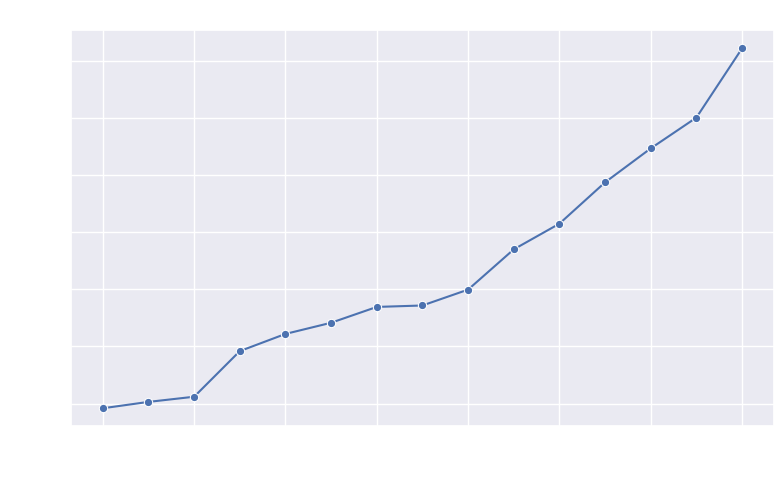

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate to national level by year
national_trend = df_statelevel.groupby("STUDYYEAR")["Center-Based Preschool Cost"].mean().reset_index()

# Set up dark style (optional, for consistency with white labels)
sns.set_theme(style="darkgrid")

plt.figure(figsize=(8, 5))
ax = sns.lineplot(data=national_trend, x="STUDYYEAR", y="Center-Based Preschool Cost", marker="o")

# Set title and axis labels
plt.title("National Trend: Center-Based Preschool Cost (2008–2022)", color='white')
plt.xlabel("Year", color='white')
plt.ylabel("Avg Weekly Cost ($)", color='white')

# Set tick label colors
ax.tick_params(colors='white')  # both x and y ticks
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Save with transparent background
plt.tight_layout()
plt.savefig("visualizations/national_trend.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

/var/folders/h0/8v6v3t9946jddznl2qvqk22w0000gn/T/ipykernel_3810/4045567930.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




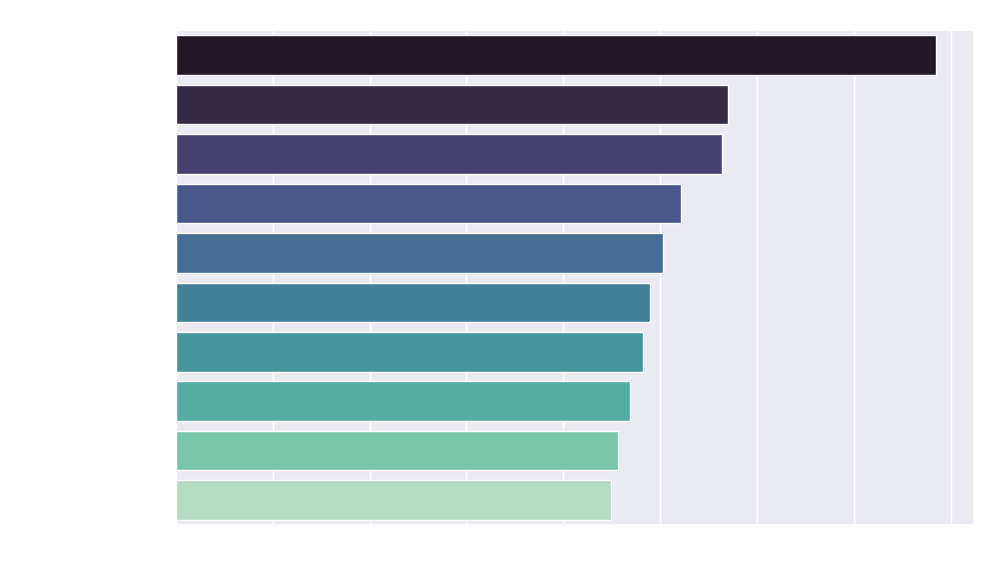

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set_theme(style="darkgrid")

# Get latest year
latest_year = df_statelevel['STUDYYEAR'].max()

# Top 10 states
top10_states = (
    df_statelevel[df_statelevel['STUDYYEAR'] == latest_year]
    .sort_values("Center-Based Preschool Cost", ascending=False)
    .head(10)
)

# Plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top10_states,
    x="Center-Based Preschool Cost",
    y="STATE_NAME",
    palette="mako"
)

# Title and labels
plt.title(f"Top 10 States by Center-Based Preschool Cost ({latest_year})", color='white')
plt.xlabel("Avg Weekly Cost ($)", color='white')
plt.ylabel("State", color='white')

# Tick labels
ax.tick_params(colors='white')

# Axis lines
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Save image
plt.tight_layout()
plt.savefig("visualizations/top_10_states_center_based_preschool.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

/var/folders/h0/8v6v3t9946jddznl2qvqk22w0000gn/T/ipykernel_3810/3469732909.py:18: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




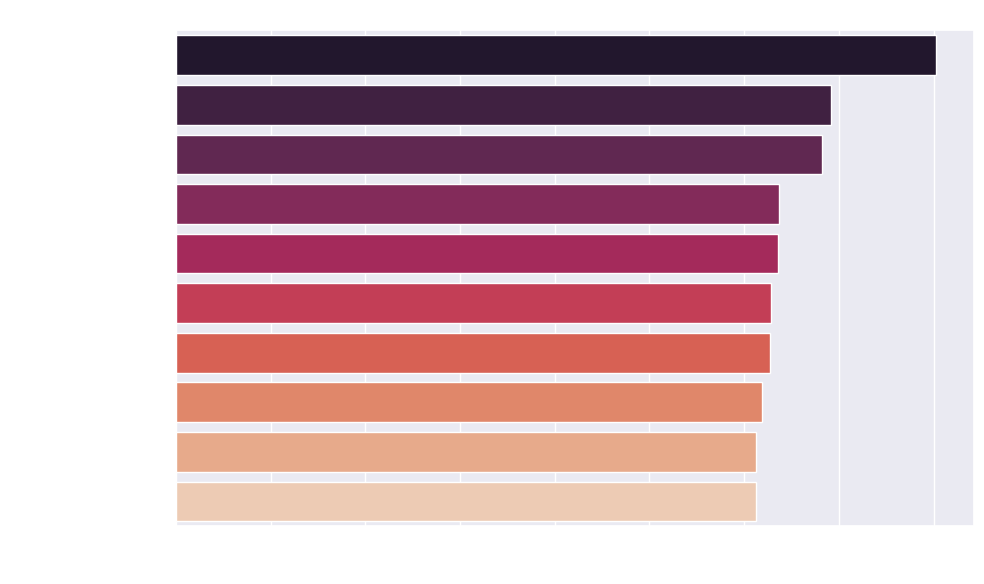

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate affordability ratio
df_statelevel["Affordability Ratio"] = (
                                               df_statelevel["Center-Based Preschool Cost"] * 52
                                       ) / df_statelevel["MHI_2022"]

# Filter for latest year
latest_year = df_statelevel['STUDYYEAR'].max()
afford_latest = df_statelevel[df_statelevel["STUDYYEAR"] == latest_year]

# Top 10 states by affordability burden
top10_burden = afford_latest.sort_values("Affordability Ratio", ascending=False).head(10)

# Create plot
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=top10_burden,
    x="Affordability Ratio",
    y="STATE_NAME",
    palette="rocket"
)

# Update styling for white labels and ticks
plt.title(f"Top 10 States by Childcare Burden ({latest_year})", color='white')
plt.xlabel("Annual Cost as % of Median Income", color='white')
plt.ylabel("State", color='white')
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Save as transparent PNG
plt.tight_layout()
plt.savefig("visualizations/top_10_childcare_burden.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [40]:
# Filter for latest year
latest_year = df_statelevel['STUDYYEAR'].max()
state_map_data = df_statelevel[df_statelevel['STUDYYEAR'] == latest_year].copy()

# Normalize affordability ratio
state_map_data["Affordability Ratio (%)"] = state_map_data["Affordability Ratio"] * 100

# Keep only required columns
state_map_data = state_map_data[[
    "STATE_NAME",
    "Center-Based Preschool Cost",
    "Affordability Ratio (%)"
]].copy()

# Defensive: Ensure state abbreviations and Affordability Ratio (%) exist for the map
if "STATE_ABBR" not in df_statelevel.columns:
    state_abbrev = {
        'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR', 'California': 'CA',
        'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE', 'District of Columbia': 'DC',
        'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID', 'Illinois': 'IL',
        'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS', 'Kentucky': 'KY', 'Louisiana': 'LA',
        'Maine': 'ME', 'Maryland': 'MD', 'Massachusetts': 'MA', 'Michigan': 'MI',
        'Minnesota': 'MN', 'Mississippi': 'MS', 'Missouri': 'MO', 'Montana': 'MT',
        'Nebraska': 'NE', 'Nevada': 'NV', 'New Hampshire': 'NH', 'New Jersey': 'NJ',
        'New Mexico': 'NM', 'New York': 'NY', 'North Carolina': 'NC', 'North Dakota': 'ND',
        'Ohio': 'OH', 'Oklahoma': 'OK', 'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI',
        'South Carolina': 'SC', 'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX',
        'Utah': 'UT', 'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA',
        'West Virginia': 'WV', 'Wisconsin': 'WI', 'Wyoming': 'WY', 'Puerto Rico': 'PR'
    }
    df_statelevel["STATE_ABBR"] = df_statelevel["STATE_NAME"].map(state_abbrev)
if "Affordability Ratio (%)" not in df_statelevel.columns and "Affordability Ratio" in df_statelevel.columns:
    df_statelevel["Affordability Ratio (%)"] = df_statelevel["Affordability Ratio"] * 100

In [41]:
# Cost map
fig_cost = px.choropleth(
    state_map_data,
    locations="STATE_ABBR",
    locationmode="USA-states",
    color="Center-Based Preschool Cost",
    color_continuous_scale="Reds",
    scope="usa",
    title="Center-Based Preschool Cost by State (2022)"
)
fig_cost.show()
fig_cost.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',   # transparent overall background
    plot_bgcolor='rgba(0,0,0,0)'     # transparent plot area
)
pio.write_image(fig_cost, "visualizations/preschool_cost_by_state.png", width=1200, height=800, scale=2)

ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['STATE_NAME', 'Center-Based Preschool Cost', 'Affordability Ratio (%)'] but received: STATE_ABBR

In [42]:
# Affordability Map
fig_ratio = px.choropleth(
    state_map_data,
    locations="STATE_ABBR",
    locationmode="USA-states",
    color="Affordability Ratio (%)",
    color_continuous_scale="Reds",
    scope="usa",
    title="Childcare Affordability Ratio by State (2022)"
)
fig_ratio.show()
fig_ratio.update_layout(
    paper_bgcolor='rgba(0,0,0,0)',   # transparent overall background
    plot_bgcolor='rgba(0,0,0,0)'     # transparent plot area
)
pio.write_image(fig_ratio, "visualizations/affordability_ratio_by_state.png", width=1200, height=800, scale=2)

ValueError: Value of 'locations' is not the name of a column in 'data_frame'. Expected one of ['STATE_NAME', 'Center-Based Preschool Cost', 'Affordability Ratio (%)'] but received: STATE_ABBR

In [43]:
# Only use county-level data
df['LEVEL'] = df['COUNTY_NAME'].isnull().map({True: 'state', False: 'county'})
county_df = df[df['LEVEL'] == 'county'].copy()

# Drop rows missing TOTALPOP or preschool cost
county_df = county_df.dropna(subset=["TOTALPOP", "MC36to41"])

# Create urbanicity buckets based on population quartiles
county_df["Urbanicity"] = pd.qcut(
    county_df["TOTALPOP"],
    q=[0, 0.25, 0.75, 1.0],
    labels=["Rural", "Suburban", "Urban"]
)

print(county_df["Urbanicity"].value_counts())

Urbanicity
Suburban    17745
Rural        8873
Urban        8872
Name: count, dtype: int64


/var/folders/h0/8v6v3t9946jddznl2qvqk22w0000gn/T/ipykernel_3810/1848281809.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




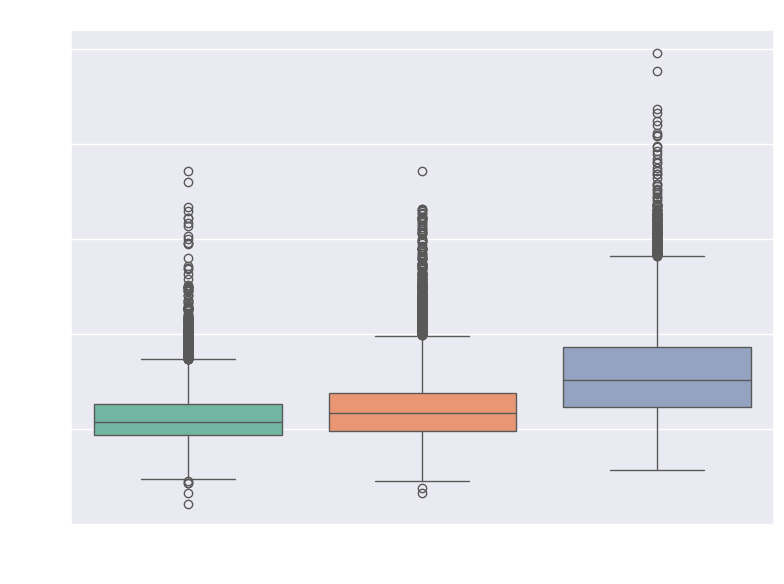

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
ax = sns.boxplot(
    data=county_df,
    x="Urbanicity",
    y="MC36to41",  # Weekly center-based cost for ages ~3–3.5
    palette="Set2"
)

# White text styling
plt.title("Center-Based Preschool Cost by Urbanicity (County-Level, 2022)", color='white')
plt.xlabel("Urbanicity (Based on Total Population Quartiles)", color='white')
plt.ylabel("Weekly Cost ($)", color='white')
ax.tick_params(colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['left'].set_color('white')

# Save with transparent background
plt.tight_layout()
plt.savefig("visualizations/urbanicity.png", dpi=300, bbox_inches='tight', transparent=True)
plt.show()

In [59]:
# Install dash-bootstrap-components if not already installed
!pip install dash-bootstrap-components --quiet

from dash import Dash, dcc, html, Input, Output
import dash_bootstrap_components as dbc
import plotly.express as px

# Use the dataframes already created in the notebook: df, df_statelevel, county_df

# App setup
app = Dash(__name__, external_stylesheets=[dbc.themes.DARKLY])
years = sorted(df_statelevel['STUDYYEAR'].unique())
latest_year = max(years)

# Layout
def get_layout():
    return dbc.Container([
        html.H2("U.S. Childcare Cost & Affordability Dashboard", style={"color": "white", "marginTop": 20}),
        html.Div([
            html.Label("Select Year:", style={"color": "white", "marginRight": 10}),
            dcc.Dropdown(
                id="year-dropdown",
                options=[{"label": str(y), "value": y} for y in years],
                value=latest_year,
                clearable=False,
                style={"width": "200px", "color": "#222"}
            ),
        ], style={"marginBottom": 30}),
        dbc.Row([
            dbc.Col([
                dcc.Graph(id="national-trend", config={"displayModeBar": False}),
            ], width=6),
            dbc.Col([
                dcc.Graph(id="top10-bar", config={"displayModeBar": False}),
            ], width=6),
        ]),
        dbc.Row([
            dbc.Col([
                dcc.Graph(id="choropleth", config={"displayModeBar": False}),
            ], width=6),
            dbc.Col([
                dcc.Graph(id="urbanicity-box", config={"displayModeBar": False}),
            ], width=6),
        ]),
    ], fluid=True, style={"backgroundColor": "#222", "paddingBottom": 40})

app.layout = get_layout

# Callbacks
def make_dashboard_callbacks(app):
    @app.callback(
        Output("national-trend", "figure"),
        Output("top10-bar", "figure"),
        Output("choropleth", "figure"),
        Output("urbanicity-box", "figure"),
        Input("year-dropdown", "value"),
    )
    def update_dashboard(selected_year):
        # 1. National Trend (static)
        national_trend = df_statelevel.groupby("STUDYYEAR")["Center-Based Preschool Cost"].mean().reset_index()
        fig_trend = px.line(
            national_trend,
            x="STUDYYEAR",
            y="Center-Based Preschool Cost",
            markers=True,
            title="National Trend: Center-Based Preschool Cost (2008–2022)"
        )
        fig_trend.update_layout(
            template="plotly_dark",
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',
            font_color="white",
            title_font_color="white"
        )
        fig_trend.update_xaxes(title="Year", color="white")
        fig_trend.update_yaxes(title="Avg Weekly Cost ($)", color="white")

        # 2. Top Right: Use a box plot of Center-Based Preschool Cost by region (if available), else by all states
        try:
            # Try to use a region column if it exists, else just plot all state costs as a box plot
            if "REGION" in df_statelevel.columns:
                box_data = df_statelevel[df_statelevel["STUDYYEAR"] == selected_year]
                box_data = box_data.dropna(subset=["Center-Based Preschool Cost", "REGION"])
                if box_data.empty:
                    fig_top10 = safe_box(title=f"No data for {selected_year}")
                else:
                    fig_top10 = safe_box(
                        box_data,
                        x="REGION",
                        y="Center-Based Preschool Cost",
                        color="REGION",
                        title=f"Center-Based Preschool Cost by Region ({selected_year})"
                    )
                    fig_top10.update_layout(
                        template="plotly_dark",
                        paper_bgcolor='rgba(0,0,0,0)',
                        plot_bgcolor='rgba(0,0,0,0)',
                        font_color="white",
                        title_font_color="white"
                    )
                    fig_top10.update_xaxes(title="Region", color="white")
                    fig_top10.update_yaxes(title="Avg Weekly Cost ($)", color="white")
            else:
                # Fallback: box plot of all state costs
                box_data = df_statelevel[df_statelevel["STUDYYEAR"] == selected_year]
                box_data = box_data.dropna(subset=["Center-Based Preschool Cost"])
                if box_data.empty:
                    fig_top10 = safe_box(title=f"No data for {selected_year}")
                else:
                    fig_top10 = safe_box(
                        box_data,
                        y="Center-Based Preschool Cost",
                        title=f"Distribution of Center-Based Preschool Cost (All States, {selected_year})"
                    )
                    fig_top10.update_layout(
                        template="plotly_dark",
                        paper_bgcolor='rgba(0,0,0,0)',
                        plot_bgcolor='rgba(0,0,0,0)',
                        font_color="white",
                        title_font_color="white"
                    )
                    fig_top10.update_yaxes(title="Avg Weekly Cost ($)", color="white")
        except Exception as e:
            print(f"Box plot error: {e}")
            fig_top10 = safe_box(title="No data")
        # 3. Choropleth Map (Affordability Ratio)
        map_data = df_statelevel[df_statelevel["STUDYYEAR"] == selected_year].copy()
        fig_map = px.choropleth(
            map_data,
            locations="STATE_ABBR",
            locationmode="USA-states",
            color="Affordability Ratio (%)",
            color_continuous_scale="Reds",
            scope="usa",
            title="Childcare Affordability Ratio by State"
        )
        fig_map.update_layout(
            template="plotly_dark",
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',
            font_color="white",
            title_font_color="white",
            geo=dict(bgcolor='rgba(0,0,0,0)')
        )

        # 4. Urbanicity Box Plot
        county_year = county_df[county_df["STUDYYEAR"] == selected_year]
        fig_urban = px.box(
            county_year,
            x="Urbanicity",
            y="MC36to41",
            color="Urbanicity",
            color_discrete_sequence=px.colors.qualitative.Set2,
            title="Center-Based Preschool Cost by Urbanicity (County-Level)"
        )
        fig_urban.update_layout(
            template="plotly_dark",
            paper_bgcolor='rgba(0,0,0,0)',
            plot_bgcolor='rgba(0,0,0,0)',
            font_color="white",
            title_font_color="white",
            showlegend=False
        )
        fig_urban.update_xaxes(title="Urbanicity (Based on Total Population Quartiles)", color="white")
        fig_urban.update_yaxes(title="Weekly Cost ($)", color="white")

        return fig_trend, fig_top10, fig_map, fig_urban

make_dashboard_callbacks(app)

if __name__ == "__main__":
    app.run(debug=True)